In [2]:
import os
import argparse
import os
import torch
from exp.exp_main import Exp_Main
import random
import numpy as np
from utils.tools import dotdict
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

import os
import datetime
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline

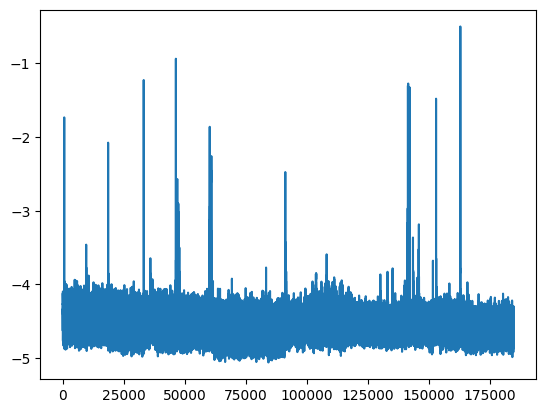

In [31]:
def get_ds(index,start_ts=0,step=120):
    index_tmp=index*step+start_ts
    date=datetime.datetime.fromtimestamp(index_tmp).strftime('%Y-%m-%d %H:%M:%S')
    date=pd.Timestamp(date)
    return date

def norm(value):
    # if value>0.05:
    #     return 0.05
    if value<0.005:
        return 0.0108-0.0023
    else:
        return value

df=pd.read_csv('datasets/data.csv')

df['index']=range(df.__len__())
df['date']=df['index'].map(get_ds)

# df['ts_norm']=df['index'].map(get_norm_time)

# del df['index']
del df['id']

df['e_mu_current']=df['e_mu_current'].map(norm)

# df['OT']=np.log(df['OT'])
# df['e_nu_1']=np.log(df['e_nu_1'])
# df['e_nu_2']=np.log(df['e_nu_2'])
# df['q_mu']=np.log(df['q_mu'])
# df['q_nu1']=np.log(df['q_nu1'])
# df['q_nu2']=np.log(df['q_nu2'])
df['e_mu_current']=np.log(df['e_mu_current'])


# df['e_mu_current']=(df['e_mu_current']-np.mean(df['e_mu_current']))/np.std(df['e_mu_current'])

plt.plot(df['e_mu_current'])
plt.show()

In [32]:
print(np.max(np.exp(df['e_mu_current'])))
print(np.min(np.exp(df['e_mu_current'])))
print(np.mean((df['e_mu_current'])))
print(np.std(df['e_mu_current']))

0.60596
0.00636
-4.539875090929247
0.18478267355460223


In [33]:
outliers=pd.read_csv('./../datasets_qrate/outliers_info.csv')[['index','class','steps_to_anomaly']]

def replace_str(value):
    if value=='anomaly':
        return 1
    else:
        return 0

outliers['class']=outliers['class'].map(replace_str)
outliers

,index,class,steps_to_anomaly
0,592,0,10
1,593,0,9
2,594,0,8
3,595,0,7
4,596,0,6
...,...,...,...
3239,163001,1,0
3240,163002,1,0
3241,163003,1,0
3242,163004,1,0


In [34]:
df_outliers=df.iloc[outliers['index']]

df_non_outliers = pd.merge(df,df_outliers, on='index',how='left')
df_non_outliers = df[~df.isin(df_outliers)].dropna()
df_non_outliers

,e_mu_current,e_nu_1,e_nu_2,q_mu,q_nu1,q_nu2,index,date
0,-4.344346,0.01904,0.17794,0.550377,0.164911,0.008094,0.0,1970-01-01 03:00:00
1,-4.355969,0.01672,0.20868,0.564295,0.167629,0.006639,1.0,1970-01-01 03:02:00
2,-4.367729,0.01337,0.20442,0.564179,0.164110,0.007052,2.0,1970-01-01 03:04:00
3,-4.483838,0.01637,0.18453,0.573555,0.167174,0.006663,3.0,1970-01-01 03:06:00
4,-4.449022,0.01783,0.11478,0.569296,0.169658,0.006823,4.0,1970-01-01 03:08:00
...,...,...,...,...,...,...,...,...
184845,-4.777145,0.02085,0.25589,0.566484,0.172819,0.008164,184845.0,1970-09-14 20:30:00
184846,-4.634599,0.01592,0.23668,0.572031,0.170474,0.007907,184846.0,1970-09-14 20:32:00
184847,-4.726209,0.01590,0.24216,0.569204,0.173147,0.007366,184847.0,1970-09-14 20:34:00
184848,-4.746734,0.01384,0.24447,0.570114,0.168854,0.007378,184848.0,1970-09-14 20:36:00


In [35]:
del df_non_outliers['index']
del df_outliers['index']

print(len(df_non_outliers))
print(len(df_non_outliers)*0.1)
print(len(df_outliers))
print(len(df_outliers)*0.1)

181606
18160.600000000002
3244
324.40000000000003


In [36]:
df_non_outliers.iloc[:-18160].to_csv('datasets/non_outliers_step=120_log_inf_train=0.9.csv',index=False,)
df_non_outliers.iloc[-18160:].to_csv('datasets/non_outliers_step=120_log_inf_test=0.1.csv',index=False,)

df_outliers.iloc[:-300].to_csv('datasets/outliers_step=120_log_inf_train=0.9.csv',index=False,)
df_outliers.iloc[-300:].to_csv('datasets/outliers_step=120_log_inf_test=0.1.csv',index=False,)

In [39]:
df_outliers

,e_mu_current,e_nu_1,e_nu_2,q_mu,q_nu1,q_nu2,date
592,-4.594230,0.01179,0.13199,0.566571,0.168555,0.007582,1970-01-01 22:44:00
593,-4.461936,0.01485,0.14204,0.568549,0.170523,0.007065,1970-01-01 22:46:00
594,-4.503517,0.01633,0.14344,0.560374,0.169472,0.007911,1970-01-01 22:48:00
595,-4.417861,0.01449,0.16491,0.569119,0.170234,0.008328,1970-01-01 22:50:00
596,-4.513503,0.02089,0.14200,0.563663,0.171959,0.006341,1970-01-01 22:52:00
...,...,...,...,...,...,...,...
163001,-3.650043,0.03294,0.16284,0.565059,0.171263,0.008019,1970-08-15 12:22:00
163002,-3.580204,0.03436,0.21951,0.574168,0.166804,0.007346,1970-08-15 12:24:00
163003,-3.593569,0.03223,0.24566,0.565816,0.166541,0.006781,1970-08-15 12:26:00
163004,-3.646970,0.04134,0.17971,0.567615,0.172872,0.007888,1970-08-15 12:28:00


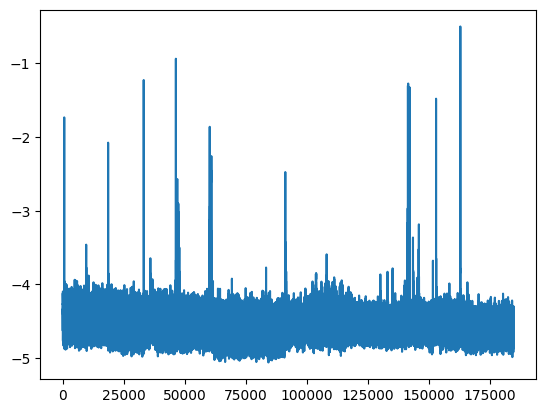

In [37]:
# df=pd.read_csv('datasets/outliers_step=120_log_inf_train=0.9.csv')
plt.plot(df['e_mu_current'])
plt.show()


In [38]:
df

,e_mu_current,e_nu_1,e_nu_2,q_mu,q_nu1,q_nu2,index,date
0,-4.344346,0.01904,0.17794,0.550377,0.164911,0.008094,0,1970-01-01 03:00:00
1,-4.355969,0.01672,0.20868,0.564295,0.167629,0.006639,1,1970-01-01 03:02:00
2,-4.367729,0.01337,0.20442,0.564179,0.164110,0.007052,2,1970-01-01 03:04:00
3,-4.483838,0.01637,0.18453,0.573555,0.167174,0.006663,3,1970-01-01 03:06:00
4,-4.449022,0.01783,0.11478,0.569296,0.169658,0.006823,4,1970-01-01 03:08:00
...,...,...,...,...,...,...,...,...
184845,-4.777145,0.02085,0.25589,0.566484,0.172819,0.008164,184845,1970-09-14 20:30:00
184846,-4.634599,0.01592,0.23668,0.572031,0.170474,0.007907,184846,1970-09-14 20:32:00
184847,-4.726209,0.01590,0.24216,0.569204,0.173147,0.007366,184847,1970-09-14 20:34:00
184848,-4.746734,0.01384,0.24447,0.570114,0.168854,0.007378,184848,1970-09-14 20:36:00


In [61]:

# fix_seed = 2021
# np.random.seed(fix_seed)
# torch.manual_seed(fix_seed)
# np.random.seed(fix_seed)

args = dotdict()
args.target = 'e_mu_current'
args.des = 'test'
args.dropout = 0.05
args.num_workers = 10
args.gpu = 0
args.lradj = 'type1'
args.devices = '0'
args.use_gpu = True
args.use_multi_gpu = False

args.freq = 's'
args.checkpoints = './checkpoints/'
args.bucket_size = 4
args.n_hashes = 4
args.is_trainging = True
args.root_path = './datasets/'
# args.data_path ='non_outliers_step=120_log_inf_train=0.9.csv' 
args.data_path ='outliers_step=120_log_inf_train=0.9.csv' 
args.model_id='qber_96_48_120_loginf_s_outliers'
args.model = 'Autoformer'
args.data = 'custom'
args.features = 'MS'
args.seq_len = 96
args.label_len = 48
args.pred_len = 1
args.e_layers = 6
args.d_layers = 6
args.n_heads = 8
args.factor = 3
args.enc_in = 6
args.dec_in =6
args.c_out = 6
args.d_model = 512
args.des = 'Exp'
args.itr = 1
args.d_ff = 2048
args.moving_avg = 25
args.factor = 1
args.distil = False
args.output_attention = True
args.patience= 3
args.learning_rate = 0.0001
args.batch_size = 64
args.embed = 'timeF'
args.activation = 'gelu'
args.use_amp = False
args.loss = 'mse'
args.train_epochs = 10

exp = Exp_Main(args)

Use GPU: cuda:0


In [62]:

setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
    args.model_id,
    args.model,
    args.data,
    args.features,
    args.seq_len,
    args.label_len,
    args.pred_len,
    args.d_model,
    args.n_heads,
    args.e_layers,
    args.d_layers,
    args.d_ff,
    args.factor,
    args.embed,
    args.distil,
    args.des, 0)
print(setting)

qber_96_48_120_loginf_s_outliers_Autoformer_custom_ftMS_sl96_ll48_pl1_dm512_nh8_el6_dl6_df2048_fc1_ebtimeF_dtFalse_Exp_0


train 1964
val 296
test 588
Epoch: 1 cost time: 26.856727838516235
Epoch: 1, Steps: 30 | Train Loss: 3.6285427 Vali Loss: 1.3263911 Test Loss: 3.9356060
Validation loss decreased (inf --> 1.326391).  Saving model ...
Updating learning rate to 0.0001
Epoch: 2 cost time: 26.836649179458618
Epoch: 2, Steps: 30 | Train Loss: 1.1964711 Vali Loss: 0.5488319 Test Loss: 2.1710877
Validation loss decreased (1.326391 --> 0.548832).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 26.63003897666931
Epoch: 3, Steps: 30 | Train Loss: 0.5176481 Vali Loss: 0.3307003 Test Loss: 1.9308326
Validation loss decreased (0.548832 --> 0.330700).  Saving model ...
Updating learning rate to 2.5e-05
Epoch: 4 cost time: 26.800379276275635
Epoch: 4, Steps: 30 | Train Loss: 0.2839215 Vali Loss: 0.3163531 Test Loss: 1.8548927
Validation loss decreased (0.330700 --> 0.316353).  Saving model ...
Updating learning rate to 1.25e-05
Epoch: 5 cost time: 26.839681386947632
Epoch: 5, Steps: 30 | Train L

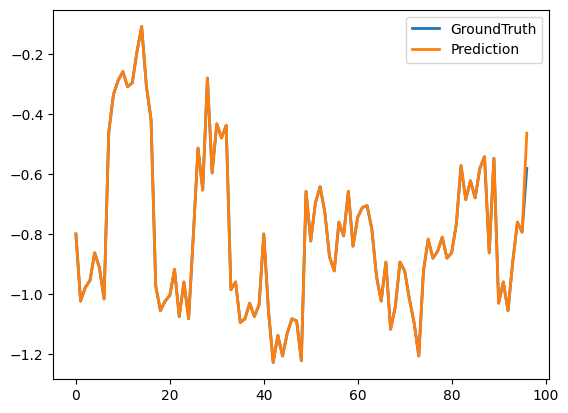

In [63]:
exp.train(setting)
exp.test(setting)

In [26]:
exp.args.root_path = './datasets/'
exp.args.data_path = 'data_step=60_test=0.1.csv'

prediction=exp.predict(setting, True)

2023-09-06:18:30:39,012 INFO     [exp_main.py:248] ./checkpoints/qber_96_48_Autoformer_custom_ftMS_sl96_ll48_pl1_dm512_nh8_el6_dl6_df2048_fc1_ebtimeF_dtFalse_Exp_0/checkpoint.pth


pred 1


In [1]:
torch.cuda.empty_cache()


NameError: name 'torch' is not defined

In [64]:
# exp_name='qber_96_48_120_loginf_t_non_outliers_Autoformer_custom_ftMS_sl96_ll48_pl1_dm512_nh8_el6_dl6_df2048_fc1_ebtimeF_dtFalse_Exp_0'
# exp_name='qber_96_48_120_loginf_t_outliers_Autoformer_custom_ftMS_sl96_ll48_pl1_dm512_nh8_el6_dl6_df2048_fc1_ebtimeF_dtFalse_Exp_0'
exp_name='qber_96_48_120_loginf_s_outliers_Autoformer_custom_ftMS_sl96_ll48_pl1_dm512_nh8_el6_dl6_df2048_fc1_ebtimeF_dtFalse_Exp_0'

data_pred = np.load(f'./results/{exp_name}/pred.npy')

data_true = np.load(f'./results/{exp_name}/true.npy')


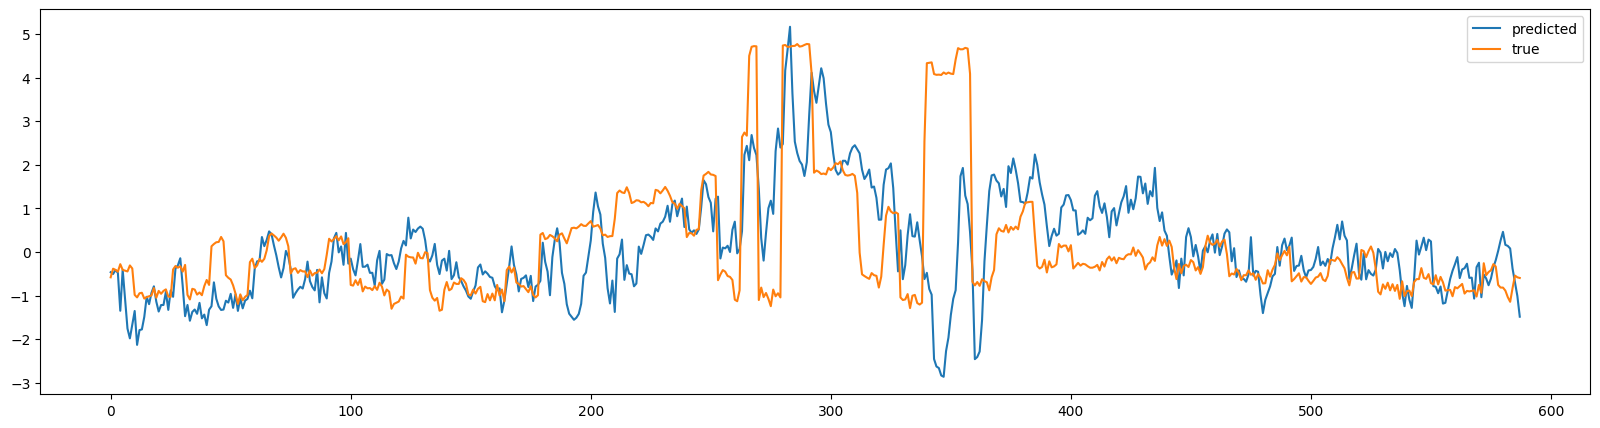

In [65]:
start=0
end=5000
plt.figure(figsize=(20,5))
plt.plot(data_pred[start:end,0,0])
plt.plot(data_true[start:end,0,0])
plt.legend(['predicted','true'])
plt.show()

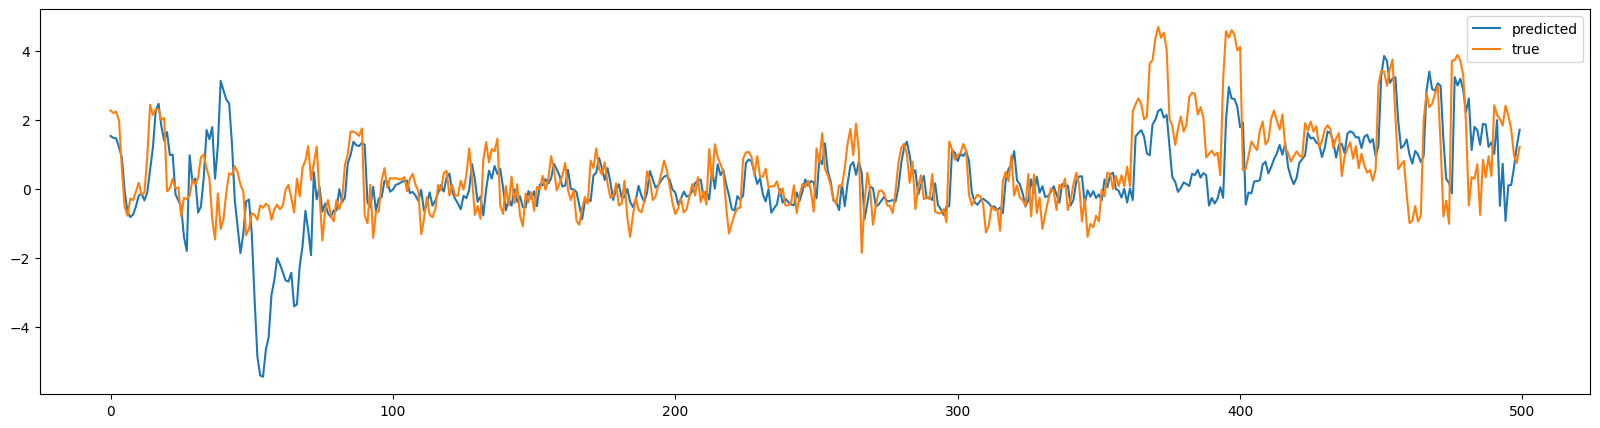

In [45]:
start=8200
end=8700
plt.figure(figsize=(20,5))
plt.plot(data_pred[start:end,0,0])
plt.plot(data_true[start:end,0,0])
plt.legend(['predicted','true'])
plt.show()